# 05. Exploratory Data Analysis

### Importando as bibliotecas

In [1]:
import sys
sys.path.append('..')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import functions.fn_stats as fn_stats
import functions.fn_charts as fn_charts
import params.consts as consts

### Lendo o dataset tratado e visualizando o overview atual

In [2]:
df = pd.read_csv(consts.PROCESSED_DATABASE) # Armazenando o dataset tratado em uma variável

df # Exbindo uma visão geral do dataset

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Years_Since_Enrolled,Age,AgeGroup,Children,MntTotal,AcceptedCmpTotal,NumTotalPurchases,HasChildren,MntRegularProds,HasAcceptedCmp
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,...,1,57,46-60,0,1617,0,22,0,1529,0
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,...,0,60,46-60,2,27,0,4,1,21,0
2,Graduation,Partner,71613.0,0,0,26,426,49,127,111,...,0,49,46-60,0,776,0,20,0,734,0
3,Graduation,Partner,26646.0,1,0,26,11,4,20,10,...,0,30,18-30,1,53,0,6,1,48,0
4,PhD,Partner,58293.0,1,0,94,173,43,118,46,...,0,33,31-45,1,422,0,14,1,407,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,Graduation,Partner,61223.0,0,1,46,709,43,182,42,...,1,47,46-60,1,1341,0,16,1,1094,0
2201,PhD,Partner,64014.0,2,1,56,406,0,30,0,...,0,68,61+,3,444,1,15,1,436,1
2202,Graduation,Single,56981.0,0,0,91,908,48,217,32,...,0,33,31-45,0,1241,1,18,0,1217,1
2203,Master,Partner,69245.0,0,1,8,428,30,214,80,...,0,58,46-60,1,843,0,21,1,782,0


In [3]:
df.info() # Exibindo as informações das variáveis do dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Education             2205 non-null   object 
 1   Marital_Status        2205 non-null   object 
 2   Income                2205 non-null   float64
 3   Kidhome               2205 non-null   int64  
 4   Teenhome              2205 non-null   int64  
 5   Recency               2205 non-null   int64  
 6   MntWines              2205 non-null   int64  
 7   MntFruits             2205 non-null   int64  
 8   MntMeatProducts       2205 non-null   int64  
 9   MntFishProducts       2205 non-null   int64  
 10  MntSweetProducts      2205 non-null   int64  
 11  MntGoldProds          2205 non-null   int64  
 12  NumDealsPurchases     2205 non-null   int64  
 13  NumWebPurchases       2205 non-null   int64  
 14  NumCatalogPurchases   2205 non-null   int64  
 15  NumStorePurchases    

In [4]:
fn_stats.describe(df) # Usando a função que exibe as estatísticas das colunas numéricas

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Days_Since_Enrolled,Years_Since_Enrolled,Age,Children,MntTotal,AcceptedCmpTotal,NumTotalPurchases,HasChildren,MntRegularProds,HasAcceptedCmp
count,2205.00,2205.00,2205.00,2205.00,2205.00,2205.00,2205.00,2205.00,2205.00,2205.00,2205.00,2205.00,2205.00,2205.00,2205.00,2205.00,2205.00,2205.00,2205.00,2205.00,2205.00,2205.00,2205.00,2205.00,2205.00,2205.00,2205.00,2205.00,2205.00,2205.00,2205.00,2205.00
mean,51622.09,0.44,0.51,49.01,306.16,26.40,165.31,37.76,27.13,44.06,2.32,4.10,2.65,5.82,5.34,0.07,0.07,0.07,0.06,0.01,0.01,0.15,353.72,0.48,45.10,0.95,606.82,0.30,12.57,0.72,562.76,0.21
std,20713.06,0.54,0.54,28.93,337.49,39.78,217.78,54.82,41.13,51.74,1.89,2.74,2.80,3.24,2.41,0.26,0.26,0.26,0.25,0.12,0.09,0.36,202.56,0.50,11.71,0.75,601.68,0.68,7.18,0.45,575.94,0.41
min,1730.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,18.00,0.00,5.00,0.00,0.00,0.00,4.00,0.00
25%,35196.00,0.00,0.00,24.00,24.00,2.00,16.00,3.00,1.00,9.00,1.00,2.00,0.00,3.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,180.00,0.00,37.00,0.00,69.00,0.00,6.00,0.00,56.00,0.00
50%,51287.00,0.00,0.00,49.00,178.00,8.00,68.00,12.00,8.00,25.00,2.00,4.00,2.00,5.00,6.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,356.00,0.00,44.00,1.00,397.00,0.00,12.00,1.00,343.00,0.00
75%,68281.00,1.00,1.00,74.00,507.00,33.00,232.00,50.00,34.00,56.00,3.00,6.00,4.00,8.00,7.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,529.00,1.00,55.00,1.00,1047.00,0.00,18.00,1.00,964.00,0.00
max,113734.00,2.00,2.00,99.00,1493.00,199.00,1725.00,259.00,262.00,321.00,15.00,27.00,28.00,13.00,20.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,699.00,1.00,74.00,3.00,2525.00,4.00,32.00,1.00,2491.00,1.00


In [5]:
df.describe(exclude='number') # Exibindo as estatísticas das colunas categóricas

,Education,Marital_Status,AgeGroup
count,2205,2205,2205
unique,5,2,4
top,Graduation,Partner,31-45
freq,1113,1422,958


In [6]:
df.isnull().sum() # Somando todos os valores nulos de cada coluna

Education               0
Marital_Status          0
Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
Days_Since_Enrolled     0
Years_Since_Enrolled    0
Age                     0
AgeGroup                0
Children                0
MntTotal                0
AcceptedCmpTotal        0
NumTotalPurchases       0
HasChildren             0
MntRegularProds         0
HasAcceptedCmp          0
dtype: int64

### Main e Flag Columns

|**Main Columns**               | **Flag Columns**              |
|-------------------------------|-------------------------------|
| Income                        | HasChildren                   |
| Recency                       | Marital_Status                |
| Days_Since_Enrolled           | Education                     |
| Age                           | HasAcceptedCmp                |
| MntTotal                      | Response                      |
|                               | AgeGroup                      |

In [7]:
total_columns = df.columns # Armazenando em uma variável todas as colunas do dataset
main_columns = ['Income','Recency', 'Days_Since_Enrolled', 'Age', 'MntTotal'] # Definindo as principais colunas
flag_columns = ['HasChildren', 'Marital_Status', 'Education', 'HasAcceptedCmp', 'Response', 'AgeGroup'] # Definindo as colunas flag

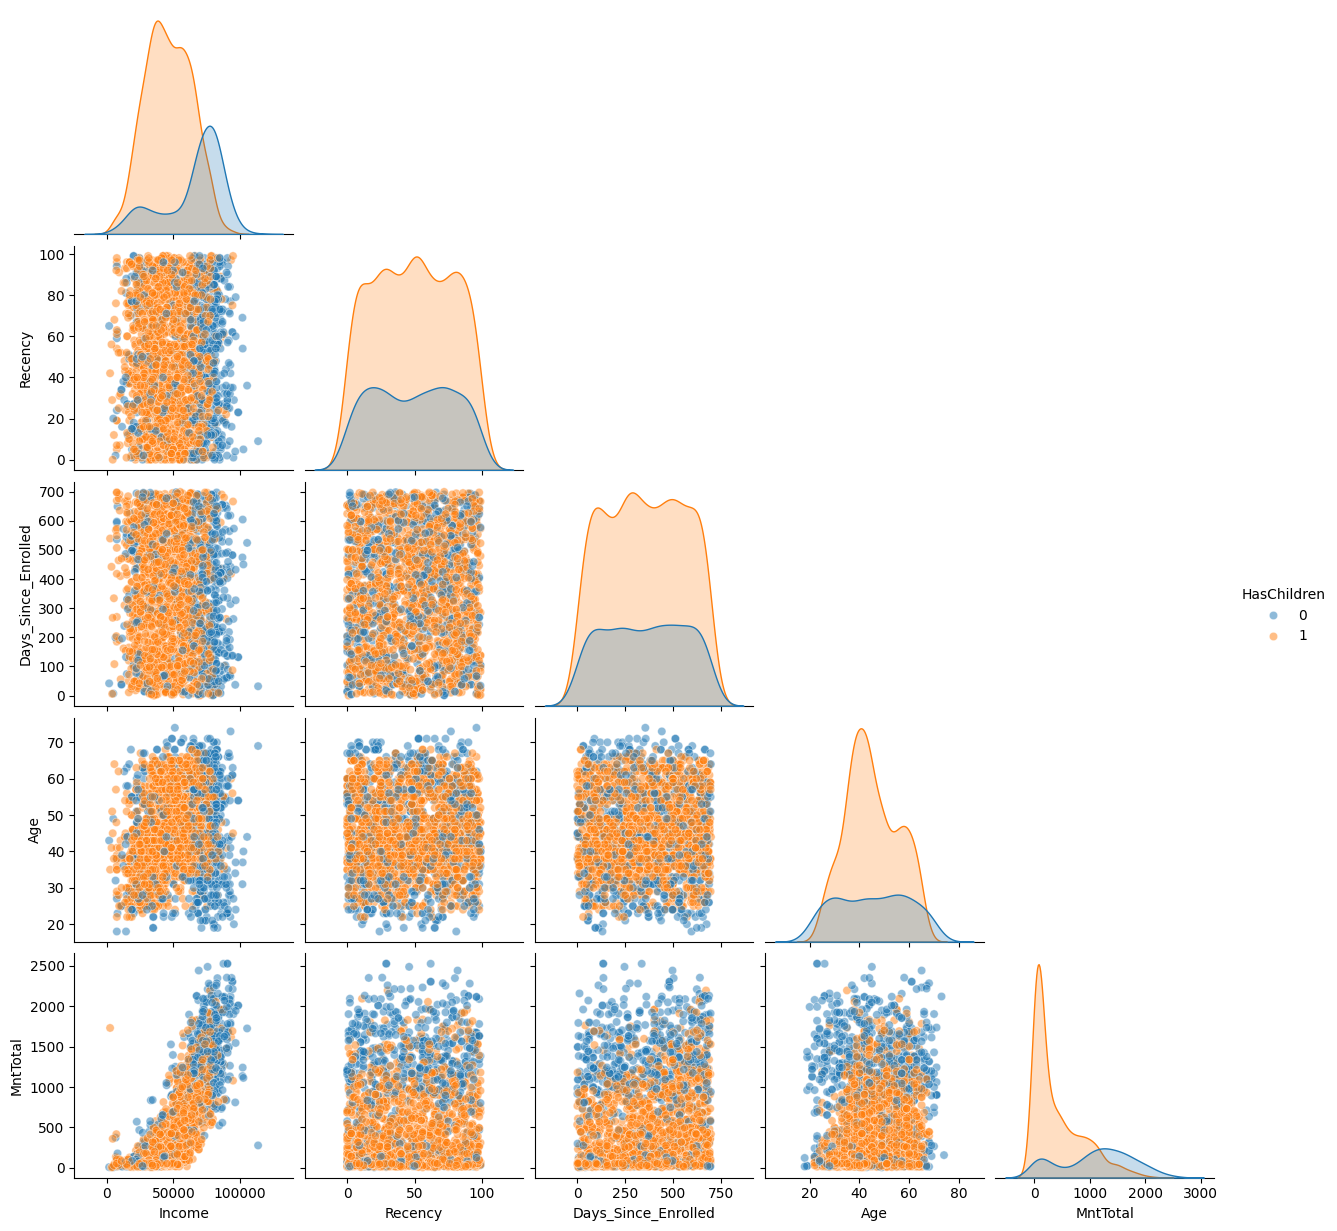

In [8]:
fn_charts.pairplots(df, main_columns, flag_columns[0])

### Resultados prévios - Conclusões e sugestões de melhorias

| | **Conclusão**               | Sugestão de Melhoria |
|-|-----------------------------|----------------------|
|1| **Dados pessoais**          | Nível de educação do cliente |
|2| **Dados pessoais**          | Se o cliente tem parceiro |
|3| **Dados pessoais**          | Se o cliente tem filhos, 0 caso contrário |

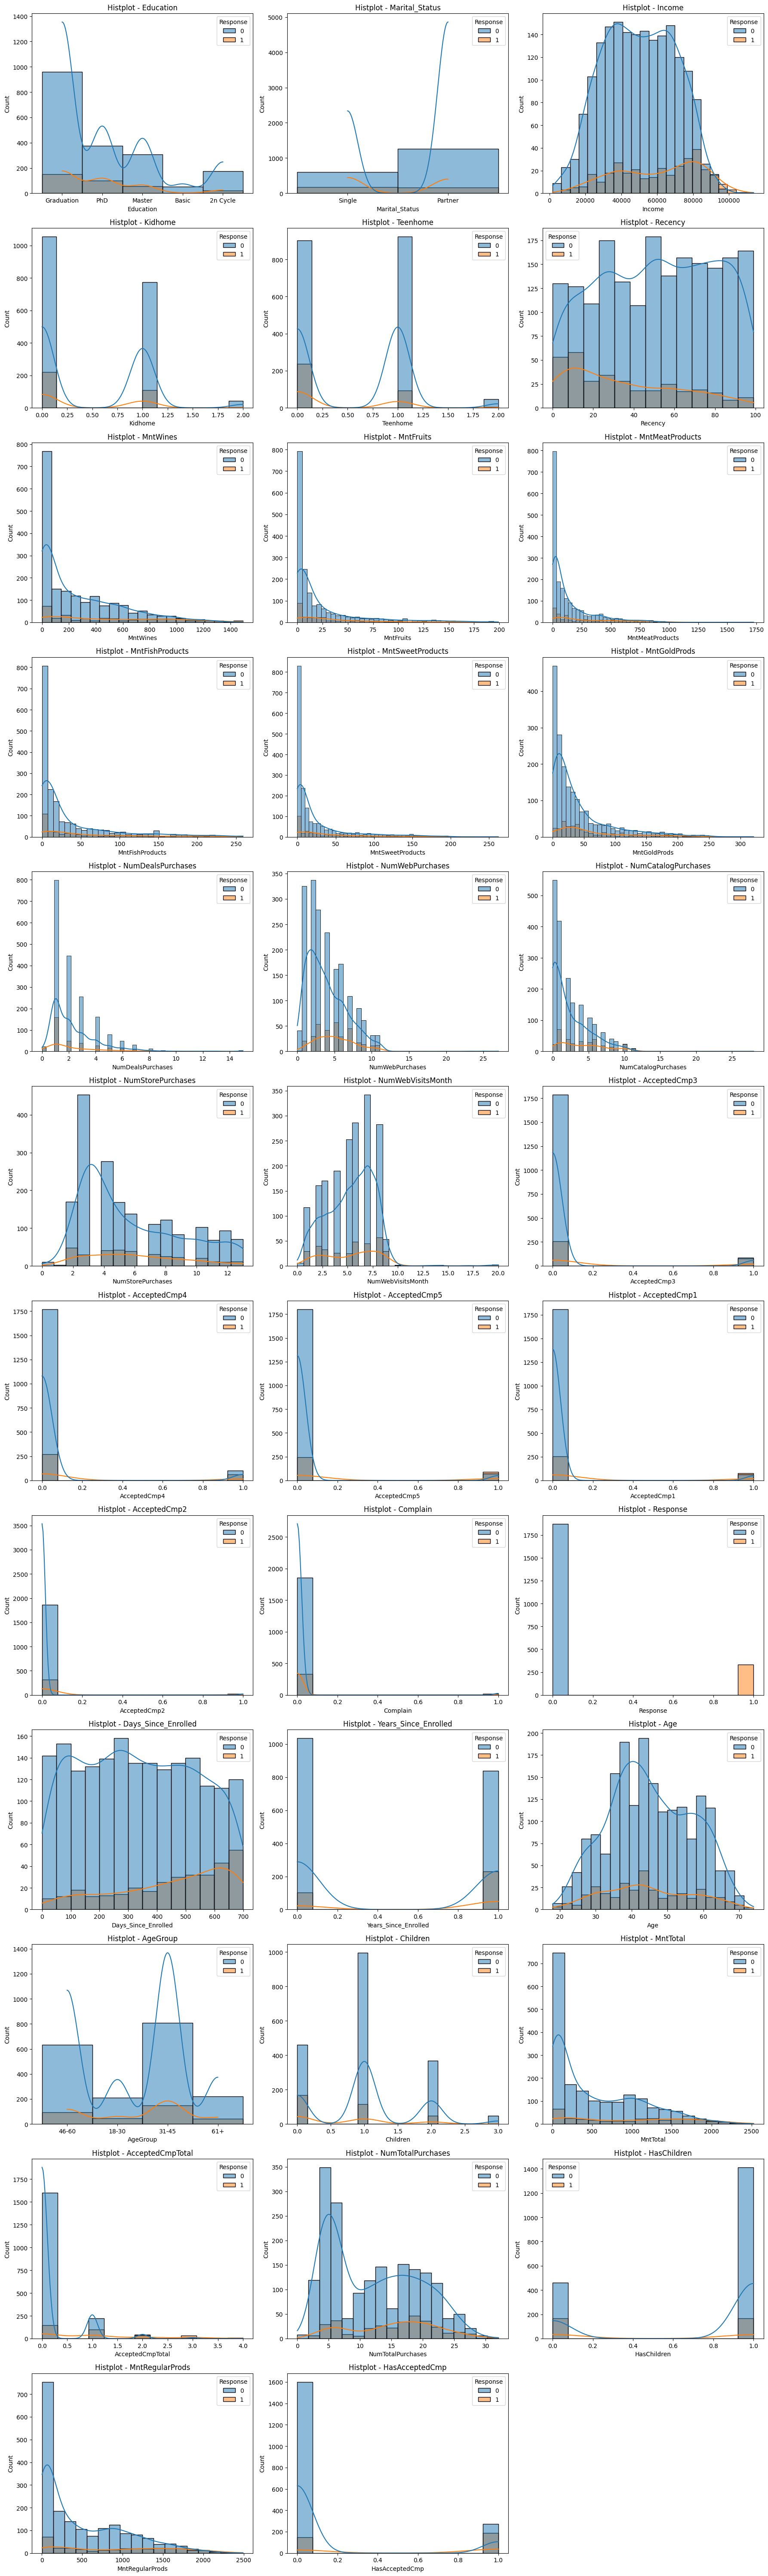

In [9]:
import math

num_cols = 3 # Definindo o número de histogramas por linha

total_columns = len(df.columns) # Definindo o número total de colunas no DataFrame

num_rows = math.ceil(total_columns / num_cols) # Calculando quantas linhas serão necessárias

fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(18, 5*num_rows)) # Criando a figura com subplots

# Ajustar a transparência e kde para cada coluna
for i, column in enumerate(df.columns):
    row = i // num_cols  # Índice da linha
    col = i % num_cols   # Índice da coluna

    sns.histplot(data=df, x=column, hue='Response', alpha=0.5, kde=True, ax=axs[row, col])
    axs[row, col].set_title(f'Histplot - {column}')

# Remover subplots vazios (se houver um número ímpar de colunas)
if total_columns % num_cols != 0:
    for j in range(total_columns, num_rows * num_cols):
        fig.delaxes(axs.flatten()[j])

plt.tight_layout()
plt.show()